# Module 1 Final Project

### Project Summary

For this project, you'll be working with the King County House Sales dataset. We've modified the dataset to make it a bit more fun and challenging.

You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

### Project Requirements

#### Organization/Code Cleanliness
The notebook should be well organized, easy to follow, and code should be commented where appropriate.

Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.


The notebook is written for a technical audience with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.


#### Visualizations & EDA
Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate).

You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labled and easy to identify inside the notebook.

Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project through the OSEMN framework.


#### Model Quality/Approach
Your model should not include any predictors with p-values greater than .05.

Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.

Level Up: Whenever necessary, you briefly explain the changes made from one iteration to the next, and why you made these choices.

You provide at least 1 paragraph explaining your final model.
You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.

### OSEMiN Data Science Model

#### Obtain:

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

#### Scrub:

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage. The line with this stage really blurs with the Explore stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.

#### Explore:

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the Scrub step mentioned above. During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks like that. If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.

#### Model:

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model.

#### Interpret:

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data. That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.

# Introduction

#### 5 key questions that I would like to address are

- Can I afford to live close to Seattle?
- What is more costly, an extra bathroom or extra bedroom?
- What has the greatest impact on price?
- How confident am I in the predictive quality of this model?
- What are some things that could cause the results to be wrong?

# Stage 1: Obtain:

In [1]:
# import the libraries that we'll need to perform exploratory data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the data
df = pd.read_csv('kc_house_data.csv')

### Column Names and descriptions for Kings County Data Set

Data dictionary with my first glance thoughts (in red)

* **id** - unique identified for a house <font color='red'>drop</font>
* **dateDate** - house was sold; house prices could be seasonal, <font color='red'>house sales could be seasonal</font> 
* **pricePrice** -  is prediction target <font color='red'>the **target**</font>
* **bedroomsNumber** -  of Bedrooms/House <font color='red'>check outliers, possibly make categorical</font>
* **bathroomsNumber** -  of bathrooms/bedrooms <font color='red'>check outliers, possibly make categorical</font>
* **sqft_livingsquare** -  footage of the home <font color='red'>house size, important, check stats</font>
* **sqft_lotsquare** -  footage of the lot <font color='red'>lot size, important, check stats</font>
* **floorsTotal** -  floors (levels) in house <font color='red'>not sure this matters, doesn't distinguish between single family homes and multi-unit housing</font>
* **waterfront** - House which has a view to a waterfront <font color='red'>could be high value, but is it a large enough share of the data?</font>
* **view** - Has been viewed <font color='red'>does this matter?</font>
* **condition** - How good the condition is ( Overall ) <font color='red'>how is this measured?</font>
* **grade** - overall grade given to the housing unit, based on King County grading system <font color='red'>could be helpful, but don't know the grading system - building materials or housing itself?</font>
* **sqft_above** - square footage of house apart from basement <font color='red'>relates to sqft_living</font>
* **sqft_basement** - square footage of the basement <font color='red'>relates to sqft_living</font>
* **yr_built** - Built Year <font color='red'>new houses are desirable, so are established neighborhoods</font>
* **yr_renovated** - Year when house was renovated <font color='red'>recent rennovations could be valueable, doesn't mention scale of rennovation</font>
* **zipcode** - zip <font color='red'>location, probably important</font>
* **lat** - Latitude coordinate <font color='red'>location, probably important</font>
* **long** - Longitude coordinate <font color='red'>location, probably important</font>
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors <font color='red'>can this help identify comps for each house?</font>
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors <font color='red'>can this help identify comps for each house?</font>


### First view of the data

In [3]:
df.shape
# how large is the dataframe? 21,000 rows, 21 columns

(21597, 21)

In [4]:
# quick preview of the data. Already see some NaN
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# check end of the data too.
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# Stage 2: Scrub:

### Summary view of the data

In [6]:
df.info()
# check the basic info of the data. Mainly numeric. 
# Why is sqft_basement an object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe()
# check 5 point statistics

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### First things to note

#### Possible Outliers
- Bedrooms: max 33; 
- sqft_lot/15: sd>mean, max is very high; 

#### Feature Ranges
- floor 1-3.5
- waterfront 0-1
- view 0-4 
- condition 1-5
- grade 3-13
- yr built 1900-2015
- rennovation - not sure

#### Other
- zipcode, lat, log look as expected

### Null values

In [8]:
df.isnull().sum()
# check for Nans: Waterfront, view, renov

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Unique values

In [9]:
# how many unique values does each column have?
for col in df:
    print(col, df[col].nunique())

id 21420
date 372
price 3622
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 304
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682


In [10]:
df_dups = df[df.duplicated(['id'],False)]
df_dups.shape

(353, 21)

In [11]:
df_dups.id.nunique()

176

In [12]:
df_dups['id'].value_counts().head(3)

795000620     3
8651402750    2
5536100020    2
Name: id, dtype: int64

In [13]:
df_dups.sort_values(by='id', ascending=True).head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.0,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.0,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.0,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.0,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969


There are 176 id duplicate ids, (1 id with 3 rows). These look like the same house sold twice or more over the time period. If we removed the duplicates and kept only the most recent sales, it may skew the data. I will leave these in. 

In [14]:
# investigate the counts of columns without a high number of unique values. First make a list, and then get value counts

low_uniq_col = []

for col in df:
    if df[col].nunique() < 30:
        low_uniq_col.append(df[col].name)
low_uniq_col

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [15]:
# Column unique value counts

for col in df:
    if df[col].name in low_uniq_col:
        print('\n', col, '\n', df[col].value_counts(), df[col].value_counts().sum())
# it helps to see where the values are concentrated in each column


 bedrooms 
 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 21597

 bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64 21597

 floors 
 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64 21597

 waterfront 
 0.0    19075
1.0      146
Name: waterfront, dtype: int64 19221

 view 
 0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 21534

 condition 
 3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dt

### sqft_basement

**investigate sqft_basement** - why is this column an object?
First, I'll look at unique values. Then I noticed that we have total living space and above living space. We could potentially calculate the missing basement values using those features

In [16]:
df.sqft_basement[0:8]
# There's the problem. The 6th item is  '?'

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [17]:
# Create a new feature to calculate basement from total living area - above living area
df['basement2'] = df['sqft_living'] - df['sqft_above']

In [18]:
# A second new feature, that takes the numerical values from sqft_basement. Will keep the original for now to use as a filter
df['basement3'] = np.where(df['sqft_basement'] != '?', df['sqft_basement'], 0)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,basement3
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,400.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910,910.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0.0


In [20]:
# The new feature takes on the type property as an object. Need to convert it. Check the stats. Mainly zeros
df['basement3'] = df['basement3'].astype(float).astype(int, copy=False)
df.basement3.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: basement3, dtype: float64

In [21]:
# Now the test. If we filter out the rows with '?', is the calculated feature the same as the orignal?
df['test'] = np.where(df['sqft_basement'] != '?',df['basement2'] - df['basement3'],0)

In [22]:
# Sum should be zero. It is! Basement can be calculated from living - above.
df['test'].sum()

0

### waterfront

Waterfront has null values, I'm going to investigate how I should replace these.

In [23]:
# testing - adding column where waterfront has null value
df['water_null'] = np.where(df['waterfront'].isnull(), 1, 0)

In [24]:
df['water_null'].sum()

2376

In [25]:
df['water_null'].describe()

count    21597.000000
mean         0.110015
std          0.312916
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: water_null, dtype: float64

**Create split databases for Waterfront Nan and 0** 

First thought is to convert waterfront Nans to 0. Before we do that, let's check the 5 point stats

Will create split dataframe where waterfront = 0, waterfront = null, and waterfront = 1


In [26]:
# new dataframe for waterfront is null, using water_null column
df_water_null = df[df["water_null"] == 1]
print(df_water_null.shape)
df_water_null.describe()

(2376, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,basement3,test,water_null
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,...,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.0,2376.0
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,...,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084,297.146465,292.798822,0.0,1.0
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,...,423.549734,53.949839,0.137431,0.140720,689.428551,24694.192000,440.511772,438.564289,0.0,0.0
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,...,0.000000,98001.000000,47.180800,-122.503000,780.000000,788.000000,0.000000,0.000000,0.0,1.0
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,...,0.000000,98033.750000,47.472925,-122.327000,1470.000000,5108.000000,0.000000,0.000000,0.0,1.0
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,...,0.000000,98070.000000,47.571400,-122.228000,1820.000000,7624.500000,0.000000,0.000000,0.0,1.0
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,...,0.000000,98118.000000,47.678000,-122.125750,2370.000000,10001.250000,600.000000,590.000000,0.0,1.0
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,...,2015.000000,98199.000000,47.777400,-121.319000,4940.000000,311610.000000,2160.000000,2160.000000,0.0,1.0


In [27]:
# new dataframes for waterfront 0 and 1
df_water_no = df[df["waterfront"] == 0]
df_water_yes = df[df["waterfront"] == 1]

In [28]:
print(df_water_no.shape)
df_water_no.describe()

(19075, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,basement3,test,water_null
count,1.907500e+04,1.907500e+04,19075.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,...,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.0,19075.0
mean,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,...,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186,287.649279,281.445662,0.0,0.0
std,2.877189e+09,3.449592e+05,0.927144,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,...,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043,437.333169,434.259744,0.0,0.0
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.0,0.0
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,...,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.0,0.0
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,...,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000,0.000000,0.000000,0.0,0.0
75%,7.334401e+09,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,...,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000,550.000000,530.000000,0.0,0.0
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4130.000000,4130.000000,0.0,0.0


In [29]:
print(df_water_yes.shape)
df_water_yes.describe()

(146, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,basement3,test,water_null
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,...,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.0
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,...,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630,735.993151,728.458904,0.0,0.0
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,...,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993,803.728076,808.010866,0.0,0.0
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,...,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000,0.000000,0.000000,0.0,0.0
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,...,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000,0.000000,0.000000,0.0,0.0
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,...,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000,560.000000,535.000000,0.0,0.0
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,...,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000,1265.000000,1265.000000,0.0,0.0
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,...,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,4820.000000,4820.000000,0.0,0.0


In [30]:
# The statistics for waterfront = 0, and waterfront = null look very similar, but very different to waterfront = 1. 
# Ok to change NaNs to zero
df.waterfront = df.waterfront.fillna(0)

In [31]:
print(df['waterfront'].value_counts())

0.0    21451
1.0      146
Name: waterfront, dtype: int64


However not all waterfront properties are equal. Looking at waterfront by zipcode, there is one zipcode that stands out with the lowest individual values and lowest overall mean. 98070 - Vashon Island. This zipcode is different in that it is an island in Puget Sound that is only accessible by ferry. 8 of the bottom 10 rows with the waterfront feature are in zipcode 98070.

Learn more about Vashon Is here:
https://www.seattletimes.com/pacific-nw-magazine/vashon-tries-to-keep-it-real-despite-an-influx-of-people-and-money/

Remembering that Waterfront 1, had a much higher mean than waterfront 0, it feels like this zipcode is disimilar to the rest of the waterfront feature. I'm going to remove this zipcode from the waterfront column.

(Note: removing Vashon Is has a minimal impact on the r2 component of the model, but it does help a little with residuals

In [32]:
df_water_yes.sort_values(by='price', ascending=False).tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,basement3,test,water_null
14813,2423029009,6/17/2014,465000.0,2,2.00,1494,19271,2.0,1.0,4.0,...,1997.0,98070,47.4728,-122.497,1494,43583,0,0,0,0
8270,221029019,4/28/2015,400000.0,3,2.50,2090,32718,2.0,1.0,4.0,...,NaN,98070,47.3338,-122.511,1200,192268,540,540,0,0
18987,5216200090,6/16/2014,385000.0,2,1.00,830,26329,1.0,1.0,3.0,...,0.0,98070,47.4012,-122.425,2030,27338,0,0,0,0
18833,7631800110,9/18/2014,380000.0,3,2.50,1980,17342,2.0,1.0,4.0,...,0.0,98166,47.4551,-122.373,2060,17313,400,400,0,0
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,0.0,98070,47.4683,-122.438,1230,14267,0,0,0,0
11544,2013802030,9/11/2014,357000.0,3,2.00,2460,53882,1.0,1.0,4.0,...,0.0,98198,47.3811,-122.325,2660,32625,0,0,0,0
6096,222029026,9/17/2014,340000.0,2,0.75,1060,48292,1.0,1.0,2.0,...,0.0,98070,47.4285,-122.511,750,80201,500,500,0,0
16556,2923039243,11/13/2014,340000.0,4,1.00,1200,11834,1.0,1.0,3.0,...,0.0,98070,47.4557,-122.443,1670,47462,0,0,0,0
1166,3523029041,10/9/2014,290000.0,2,0.75,440,8313,1.0,1.0,3.0,...,0.0,98070,47.4339,-122.512,880,26289,0,0,0,0
18261,2781600195,11/17/2014,285000.0,1,1.00,1060,54846,1.0,1.0,4.0,...,0.0,98070,47.4716,-122.445,2258,31762,0,0,0,0


In [33]:
df_water_yes.groupby('zipcode')['price'].mean()
zip_sort = df_water_yes.groupby('zipcode')['price'].mean().sort_values(ascending=False).tail(8)
zip_sort

zipcode
98136    1.413600e+06
98177    1.300000e+06
98166    1.248286e+06
98146    1.005833e+06
98178    9.193889e+05
98023    7.606667e+05
98198    7.146667e+05
98070    6.132950e+05
Name: price, dtype: float64

In [34]:
df['waterfront'] = np.where((df['waterfront'] == 1) & (df['zipcode'] != 98070), 1, 0)

In [35]:
print(df['waterfront'].value_counts())

0    21471
1      126
Name: waterfront, dtype: int64


### Null value replacement: view, yr_renovated

In [36]:
# view only has 63 null values. Ok to change NaNs to zero
df.view = df.view.fillna(0)

In [37]:
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [38]:
# yr_renovated requires a year for the renovation. The vast majority of this column is zero. 
# With no additional information to go on, it's safest to assume that these rows had no renovation and change NaN's to zero

df.yr_renovated = df.yr_renovated.fillna(0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int32
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement2        21597 non-null int64
basement3        21597 non-null int32
t

### Drop Columns

Now that we've cleaned up NaN's and '?'s. Let's drop some columns, including those we used as placeholders

In [40]:
df = df.drop(['id', 'date', 'water_null', 'sqft_basement', 'basement3', 'test'], axis =1)
print(df.shape)
df.head()

(21597, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [41]:
df.loc[(df['bedrooms'] >= 33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
15856,640000.0,33,1.75,1620,6000,1.0,0,0.0,5,7,1040,1947,0.0,98103,47.6878,-122.331,1330,4700,580


In [42]:
df.drop(df[df["bedrooms"] >= 33].index, inplace = True)

In [43]:
df.shape

(21596, 19)

In [44]:
df.loc[df['price'] > 5000000]
# I am reluctant to drop data from our target, even though these look like outliers. I'll hold off running any code here.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
1162,5110000.0,5,5.25,8010,45517,2.0,1,4.0,3,12,5990,1999,0.0,98033,47.6767,-122.211,3430,26788,2020
1313,5300000.0,6,6.00,7390,24829,2.0,1,0.0,4,12,5000,1991,0.0,98040,47.5631,-122.210,4320,24619,2390
1446,5350000.0,5,5.00,8000,23985,2.0,0,4.0,3,12,6720,2009,0.0,98004,47.6232,-122.220,4600,21750,1280
3910,7060000.0,5,4.50,10040,37325,2.0,1,2.0,3,11,7680,1940,2001.0,98004,47.6500,-122.214,3930,25449,2360
4407,5570000.0,5,5.75,9200,35069,2.0,0,0.0,3,13,6200,2001,0.0,98039,47.6289,-122.233,3560,24345,3000
7245,7700000.0,6,8.00,12050,27600,2.5,0,3.0,4,13,8570,1910,1987.0,98102,47.6298,-122.323,3940,8800,3480
9245,6890000.0,6,7.75,9890,31374,2.0,0,4.0,3,13,8860,2001,0.0,98039,47.6305,-122.240,4540,42730,1030


In [45]:
df.loc[df['sqft_lot'] > 1000000]

# 4 houses have lots over 1 million sqft. This could skew the result, so I will drop these rows.
# I could also do the same thing for sqft_lot_15, but due to a high correlation I later drop this column from the model. 
# Since I'm not using that column I want to maintain these rows of data.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
1717,700000.0,4,1.00,1300,1651359,1.0,0,3.0,4,6,1300,1920,0.0,98022,47.2313,-122.023,2560,425581,0
7640,542500.0,5,3.25,3010,1074218,1.5,0,0.0,5,8,2010,1931,0.0,98027,47.4564,-122.004,2450,68825,1000
7762,855000.0,4,3.50,4030,1024068,2.0,0,0.0,3,10,4030,2006,0.0,98045,47.4619,-121.744,1830,11700,0
17305,190000.0,2,1.00,710,1164794,1.0,0,0.0,2,5,710,1915,0.0,98014,47.6888,-121.909,1680,16730,0


In [46]:
df.drop(df.loc[df['sqft_lot'] > 1000000].index, inplace = True)


# Stage 3: Explore

### Histogram view

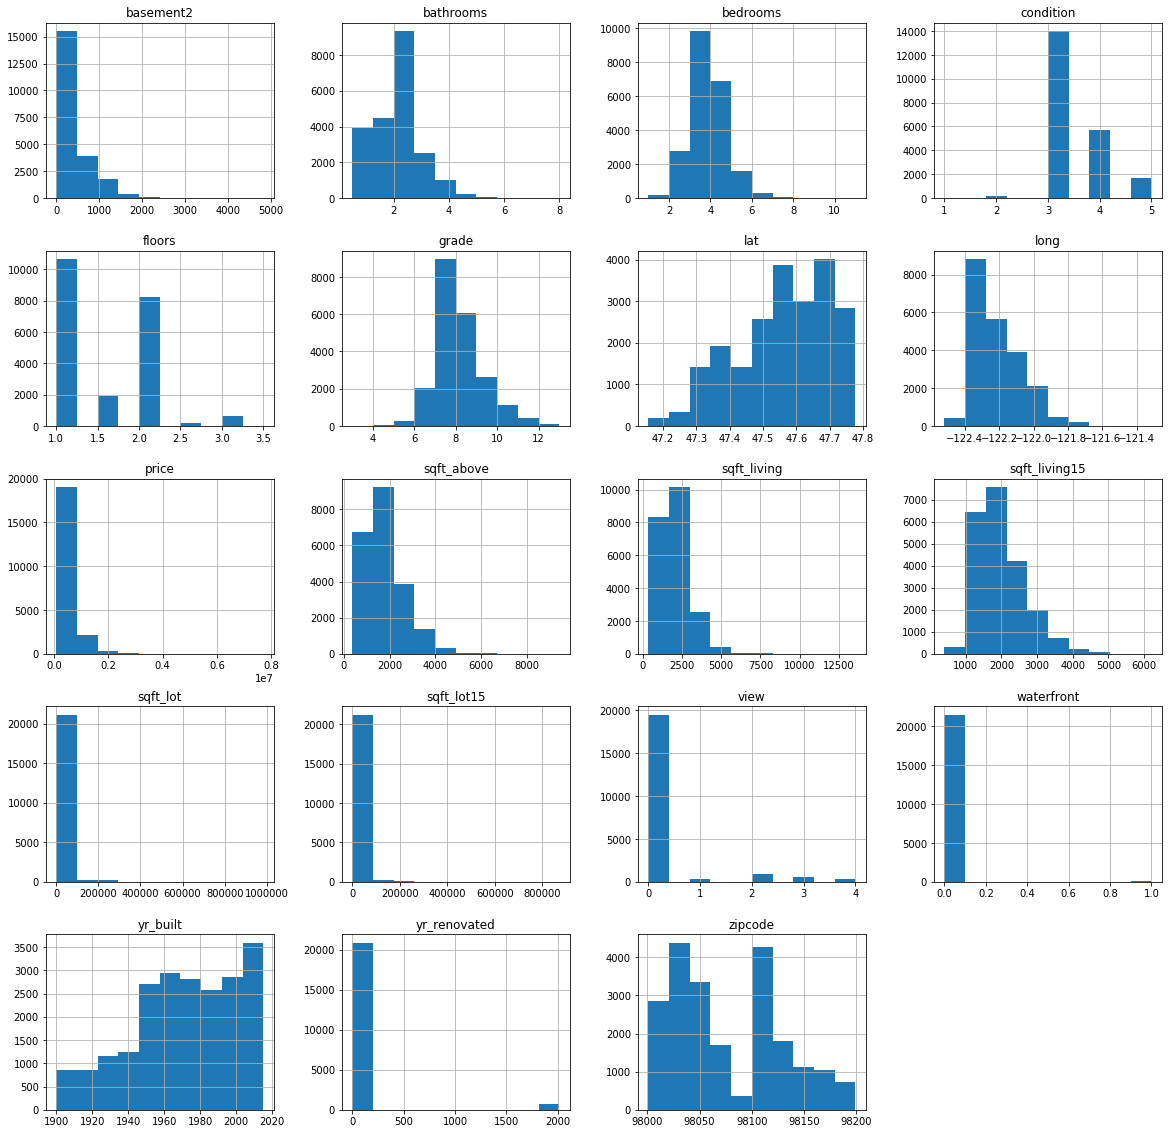

In [47]:
df.hist(figsize = (20,20));

The histograms show that only grade looks like a normal distribution. Other categories will have to be transformed

### Scatter plot view

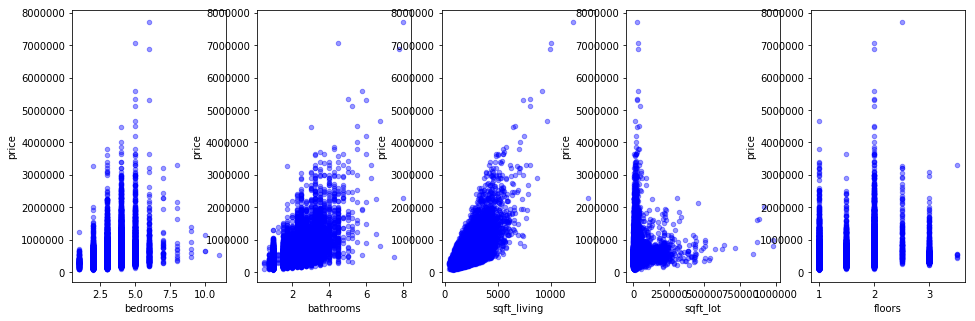

In [48]:
xlist = df.iloc[:, 1:6]
xlist.head()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')


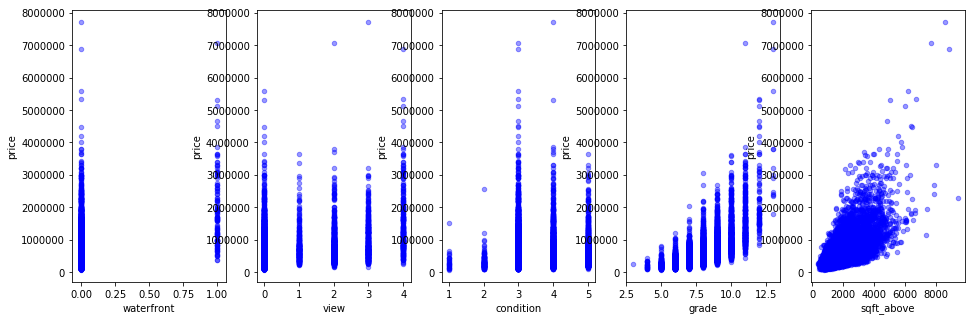

In [49]:
xlist2 = df.iloc[:, 6:11]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist2), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

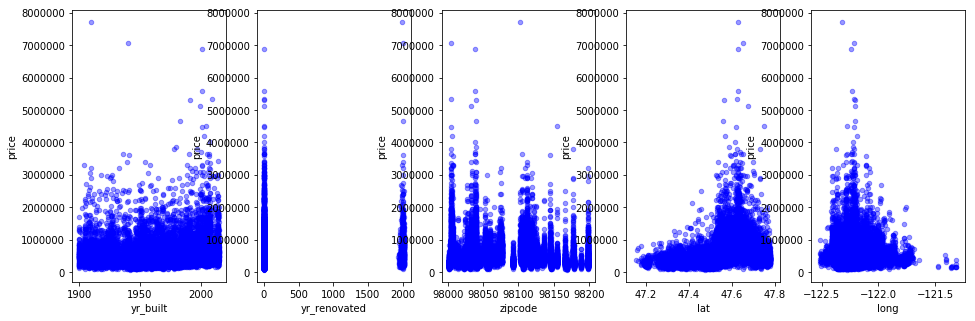

In [50]:
xlist3 = df.iloc[:, 11:16]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist3), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

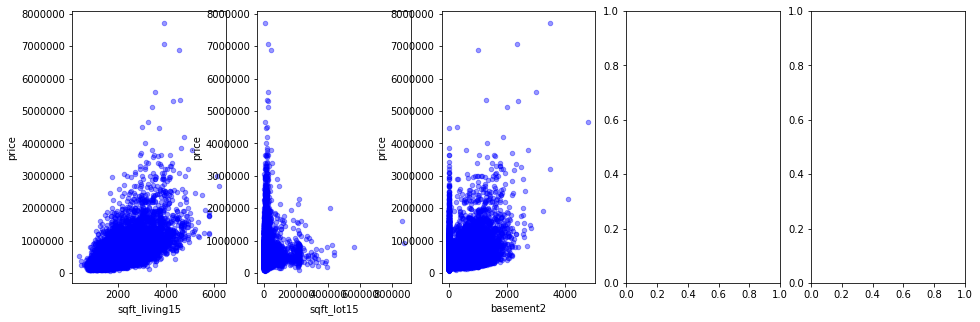

In [51]:
xlist4 = df.iloc[:, 16:]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist4), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

Scatter plots run by category against price. The sqft_living and sqft_above appear to have the strongest linear realtionship with price

### New column for renovated

The master scatter plot doesn't show much detail for renovation, because most of the values are zero.
If you exclude 0, the price for houses with renovation seems to be increasing, especially around 2000.
Here's an example of a scatter plot renovated vs price for 2000 and beyond.

Let's add a column to capture this

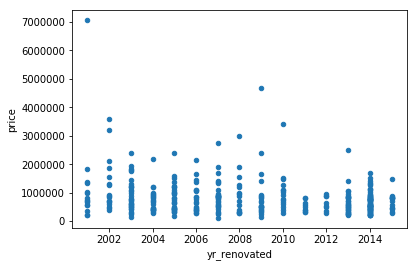

In [52]:
df_reno = df[df["yr_renovated"] > 2000]
df_reno.plot(kind='scatter', x='yr_renovated', y='price');


In [53]:
df_reno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
count,3.500000e+02,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,8.338057e+05,3.608571,2.463571,2414.745714,10458.208571,1.505714,0.011429,0.454286,3.057143,7.951429,1869.082857,1942.934286,2008.554286,98098.434286,47.588782,-122.274126,1967.700000,9524.154286,545.662857
std,6.562883e+05,1.011926,0.861419,1136.265913,17551.585022,0.497813,0.106444,1.058150,0.277407,1.185121,868.137661,23.308538,4.515643,54.538438,0.109541,0.119166,729.341504,12583.653066,590.096443
min,1.100000e+05,1.000000,1.000000,580.000000,1306.000000,1.000000,0.000000,0.000000,3.000000,5.000000,580.000000,1900.000000,2001.000000,98001.000000,47.196000,-122.479000,828.000000,1281.000000,0.000000
25%,4.387500e+05,3.000000,1.750000,1627.500000,4800.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1252.500000,1924.000000,2005.000000,98042.750000,47.539100,-122.362000,1452.500000,4818.000000,0.000000
50%,7.040000e+05,4.000000,2.500000,2310.000000,6757.500000,1.500000,0.000000,0.000000,3.000000,8.000000,1720.000000,1946.000000,2008.000000,98115.000000,47.605700,-122.295500,1800.000000,6675.000000,530.000000
75%,9.703750e+05,4.000000,3.000000,2957.500000,9981.500000,2.000000,0.000000,0.000000,3.000000,9.000000,2300.000000,1961.000000,2013.000000,98126.000000,47.666325,-122.215000,2340.000000,10075.250000,910.000000
max,7.060000e+06,9.000000,6.750000,10040.000000,224769.000000,3.000000,1.000000,4.000000,5.000000,13.000000,7680.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,173804.000000,4820.000000


In [54]:
df['reno_recent'] = np.where(df['yr_renovated'] > 2000, 1, 0)

### Location, Location, Location

It's almost universally known that the most import 3 factors in real estate are location, location, location.

Any property assement is based primary on the selling price of similar sized houses in that neighborhood.

With this in mind we have 5 location features currently in our data frame: zipcode, latitude and longitude, and sqft_living15 and sqft_lot15. Unfortunately housing price as it relates to zipcode, lat and long is not linear. You can't expect that as a zipcode increases, the house price will increase too. High priced neighborhoods can be right next to inexpense ones, not in a line from lowest to highest. sqft--15 features could be useful in indentifying comp houses. At the moment this type of back-propagation is beyond my knowledge. After running some models, I am going to drop the sqft--15 features.

I am going to  build a new attribute using latitude and longitude. I will use the equirectangular distance approximation for the shortest distance between two points given their longitudes and latitudes. (Note that I could have also used the more complicated Haversine formula which measures the distance on sphere. However for short distances (within a county for example) the difference between these formula is neglible - less than 1%) 

My starting point for this feature will use downtown Seattle. I chose this as a desirable location because Seattle is by far the largest city in King County, and proximity to work is one of the elements that make a location enticing. Does the distance from Seattle impact King Count housing prices?

The Co-ordinates for downtown Seattle are: 47.608013, -122.335167

Other futures projects could build features using location such as adding in income by zipcode, adding in school district information.


In [55]:
# calculating distance
# Seattle = 47.608013, -122.335167
# approx one degree of latitude ellipsoidal earth at 47N: 69.08 miles


def distance(Lat2, Long2):
    Lat1 = 47.608013
    Long1 = -122.335167
    x = Lat2 - Lat1
    y = (Long2 - Long1) * np.cos((Lat2 + Lat1)*(0.5 * np.pi/180))  
    return 69.08 * np.sqrt(x*x + y*y)

distance(47.5112, -122.257)

7.616113362022828

In [56]:
df['Miles_Seattle'] = df.apply(lambda x: distance(x['lat'], x['long']), axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent,Miles_Seattle
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,7.616113
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,0,7.841298
2,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,10.153451
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910,0,6.600281
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,13.526635


I'm also adding 2 features looking at whether a house is North of Seattle, or East of Seattle. (South and West are included too, in that anything to the South will be "not North" and have a zero in this column)

In [57]:
df['north_Seattle'] = np.where(df['lat'] > 47.608013 , 1, 0)
df['east_Seattle'] = np.where(df['long'] > -122.335167 , 1, 0)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,0,0,7.616113,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,400,0,7.841298,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,0,0,10.153451,1,1
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,910,0,6.600281,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,0,0,13.526635,1,1


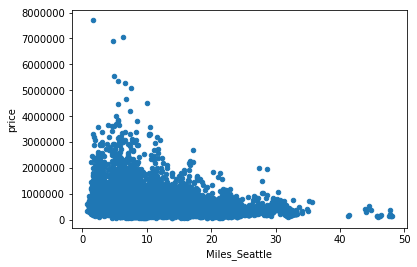

In [58]:
df.plot(kind='scatter', x='Miles_Seattle', y='price');

I am also going to build a feature of proximity to Bellevue. It is the second largest city in King County, realitively wealthy and something of tech hub. 

However, Bellevue is very close to Seattle, so I will build a derived column - "near Belluvue" and drop the distance from Bellevue. This would be too highly correlated with miles from Seattle.

In [59]:
# calculating distance from Bellevue function
# Bellevue = 47.610378, -122.200676
# approx one degree of latitude ellipsoidal earth at 47N: 69.08 miles

def distance2(Lat2, Long2):
    Lat1 = 47.610378
    Long1 = -122.200676
    x = Lat2 - Lat1
    y = (Long2 - Long1) * np.cos((Lat2 + Lat1)*(0.5 * np.pi/180))  
    return 69.08 * np.sqrt(x*x + y*y)

distance2(47.5112, -122.257)

7.337087369718484

In [60]:
df['Miles_Bellevue'] = df.apply(lambda x: distance2(x['lat'], x['long']), axis=1)
df['near_Bellevue'] = np.where(df['Miles_Bellevue'] <= 2.5 , 1, 0)

### Zipcode

Modelling zipcodes as separate categorical variables did not seem to work once I ran the model. I still feel that there is value in zipcode, so I'm creating 2 columns noting the top and bottom zipcodes. I will group the top/bottom 8 zipcodes together.

In [61]:
hi = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(8)
hi_zip_list = hi.keys().tolist()
df['hi_zip'] = np.where(df['zipcode'].isin(hi_zip_list), 1, 0)
print(hi)
print(hi_zip_list)

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
Name: price, dtype: float64
[98039, 98004, 98040, 98112, 98102, 98109, 98105, 98006]


In [62]:
lo = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).tail(8)
low_zip_list = lo.keys().tolist()
df['low_zip'] = np.where(df['zipcode'].isin(low_zip_list), 1, 0)
print(lo)
print(low_zip_list)

zipcode
98003    294111.278571
98188    289078.345588
98023    286742.811623
98148    284908.596491
98001    281194.869806
98032    251296.240000
98168    240328.371747
98002    234284.035176
Name: price, dtype: float64
[98003, 98188, 98023, 98148, 98001, 98032, 98168, 98002]


In [63]:
print(df.hi_zip.value_counts())
print(df.low_zip.value_counts())
df.head()

0    19734
1     1858
Name: hi_zip, dtype: int64
0    19666
1     1926
Name: low_zip, dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle,Miles_Bellevue,near_Bellevue,hi_zip,low_zip
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,...,5650,0,0,7.616113,0,1,7.337087,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,...,7639,400,0,7.841298,1,1,9.417982,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,...,8062,0,0,10.153451,1,1,8.936610,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,...,5000,910,0,6.600281,0,0,10.892849,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,...,7503,0,0,13.526635,1,1,7.263191,0,0,0


In [64]:
hi_df = df[df['hi_zip'] == 1]
hi_df.groupby(['hi_zip', 'zipcode'])['price'].describe()


count          mean           std       min        25%  \
hi_zip zipcode                                                           
1      98004    317.0  1.356524e+06  7.460941e+05  425000.0   845000.0   
       98006    498.0  8.599386e+05  4.462724e+05  247500.0   575625.0   
       98039     50.0  2.161300e+06  1.166904e+06  787500.0  1402500.0   
       98040    282.0  1.194874e+06  6.077676e+05  500000.0   822000.0   
       98102    104.0  8.996077e+05  7.903814e+05  330000.0   571875.0   
       98105    229.0  8.632289e+05  4.778332e+05  380000.0   550000.0   
       98109    109.0  8.800778e+05  4.557008e+05  216650.0   620000.0   
       98112    269.0  1.096239e+06  5.942232e+05  169317.0   680000.0   

                      50%        75%        max  
hi_zip zipcode                                   
1      98004    1150000.0  1690000.0  7060000.0  
       98006     760184.5   977250.0  4210000.0  
       98039    1895000.0  2560000.0  6890000.0  
       98040     993750.0  1387500.0  5300000.0  
       98102     710000.0   976175.0  7700000.0  
       98105     675000.0  1010000.0  3650000.0  
       98109     736000.0  1000000.0  3200000.0  
       98112     915000.0  1330000.0  3400000.0

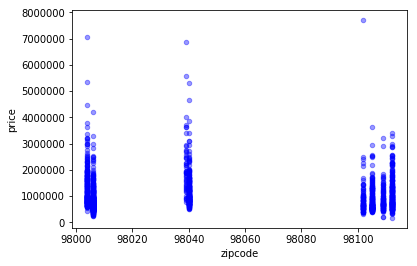

In [65]:
hi_df.plot(kind='scatter', x='zipcode', y='price', alpha=0.4, color='b')

### Categorical: Binning

Some variables do not seem to have a linear pattern between predictor and target here. We will group the data into bins so that each varaible is treated as a categorical variables. 

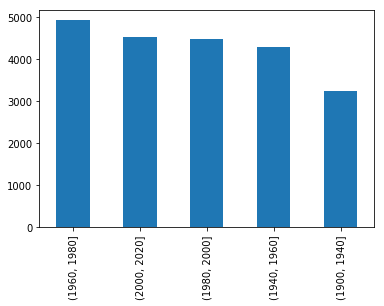

In [66]:
# create bins for based on observed values.
bins = [1900, 1940, 1960, 1980, 2000, 2020]
# use pd.cut
bins_yr = pd.cut(df['yr_built'], bins)

# using pd.cut returns ordered categories. Transform this to unordered categories.
bins_yr = bins_yr.cat.as_unordered()
bins_yr.value_counts().plot(kind='bar');


In [67]:
bins_yr.dtype

CategoricalDtype(categories=[(1900, 1940], (1940, 1960], (1960, 1980], (1980, 2000], (2000, 2020]],
              ordered=False)

In [68]:
# replace the existing "yr_built" column
df["yr_built"]=bins_yr

** Experiment **
I also tested some bins with bedrooms, bathrooms, and grade. All 3 categories had some issues. Bed and bath didn't improve the r2 result as categorical variables, and some of one hot encoded variables failed the p-value test. Grade did improve the r2 score, but it is highly correlated with sqft_living and including it increased residual issues.

### Identifying multicollinearity

The following charts and tables help me identify correlated features

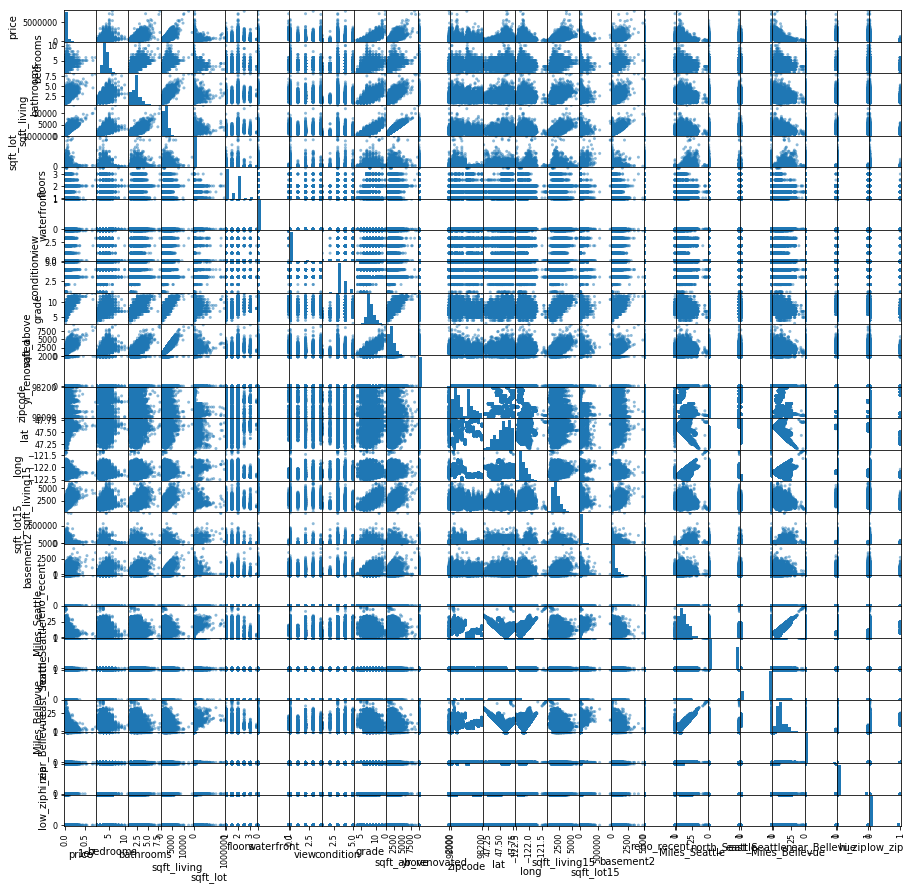

In [69]:
# Hold off running this - takes a long time
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);

In [70]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle,Miles_Bellevue,near_Bellevue,hi_zip,low_zip
price,1.000000,0.315913,0.525948,0.701963,0.097815,0.256787,0.281977,0.393566,0.035952,0.668015,...,0.083005,0.323847,0.102554,-0.286702,0.255259,0.030362,-0.408789,0.289313,0.441198,-0.227951
bedrooms,0.315913,1.000000,0.527831,0.593154,0.034345,0.183680,0.011541,0.080676,0.023085,0.366122,...,0.031420,0.309198,0.033624,0.061760,-0.022318,0.159402,-0.059799,0.080038,0.120434,-0.014739
bathrooms,0.525948,0.527831,1.000000,0.755668,0.097586,0.502514,0.074658,0.186379,-0.126706,0.665721,...,0.089692,0.283404,0.058054,0.083975,0.012827,0.142869,-0.064981,0.086544,0.144883,-0.090044
sqft_living,0.701963,0.593154,0.755668,1.000000,0.189807,0.353839,0.117397,0.282018,-0.059591,0.762701,...,0.185894,0.435194,0.046763,0.075692,0.020827,0.174696,-0.107223,0.129316,0.211165,-0.090841
sqft_lot,0.097815,0.034345,0.097586,0.189807,1.000000,-0.003331,0.010885,0.076147,-0.010803,0.128819,...,0.757290,0.017876,-0.014988,0.253805,-0.047646,0.091096,0.182514,-0.005966,-0.038415,-0.031527
floors,0.256787,0.183680,0.502514,0.353839,-0.003331,1.000000,0.027308,0.028566,-0.264129,0.458686,...,-0.010141,-0.245759,0.002753,0.003030,0.050209,0.013079,-0.037003,-0.028592,0.046936,-0.110709
waterfront,0.281977,0.011541,0.074658,0.117397,0.010885,0.027308,1.000000,0.362386,0.007829,0.096464,...,0.016571,0.088850,0.009426,-0.022090,-0.020242,-0.002696,-0.029298,-0.008178,0.019856,-0.017576
view,0.393566,0.080676,0.186379,0.282018,0.076147,0.028566,0.362386,1.000000,0.045533,0.249456,...,0.070980,0.274081,0.037138,-0.075702,-0.031643,-0.088138,-0.045266,0.004773,0.085091,-0.055247
condition,0.035952,0.023085,-0.126706,-0.059591,-0.010803,-0.264129,0.007829,0.045533,1.000000,-0.147075,...,-0.003971,0.173626,-0.069594,-0.073120,-0.001898,-0.039290,-0.043793,0.035106,0.087282,-0.007283
grade,0.668015,0.366122,0.665721,0.762701,0.128819,0.458686,0.096464,0.249456,-0.147075,1.000000,...,0.122652,0.168226,0.032108,0.006551,0.092313,0.119297,-0.163163,0.130038,0.241230,-0.123887


In [71]:
abs(df.corr()) > 0.8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle,Miles_Bellevue,near_Bellevue,hi_zip,low_zip
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [72]:
import seaborn as sns

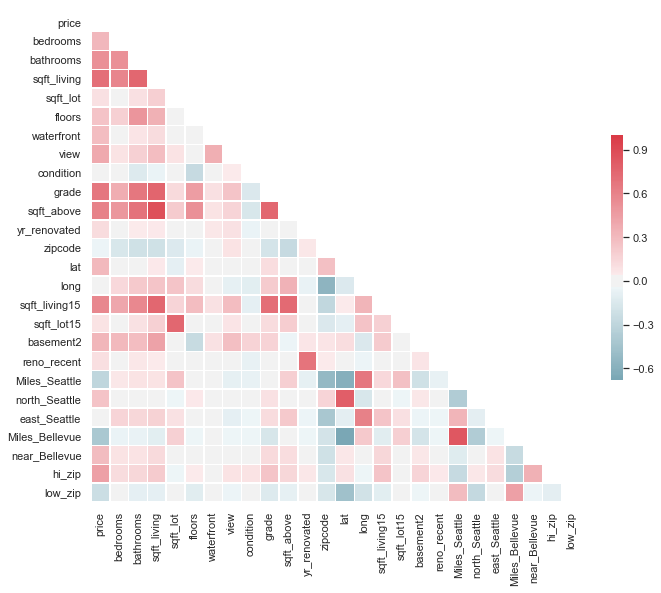

In [73]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Remove correlated features

In [74]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'basement2', 'reno_recent', 'Miles_Seattle', 'north_Seattle',
       'east_Seattle', 'Miles_Bellevue', 'near_Bellevue', 'hi_zip', 'low_zip'],
      dtype='object')

In [75]:
# before making changes duplicate df
df2 = df
df2.shape

(21592, 27)

In [76]:
data_mini = df[['price', 'sqft_living', 'sqft_above', 'Miles_Seattle', 'north_Seattle']]

In [77]:
# remove problematic features
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'view', 'yr_renovated', 'floors', 'condition', 'Miles_Bellevue', 'grade'], axis =1)
print(df.shape)
df.head(2)

# bathrooms, grade, lat, long, 
# view - remove earlier most values are zero
# yr_renovated - remove after binning

(21592, 18)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,zipcode,lat,long,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle,near_Bellevue,hi_zip,low_zip
0,221900.0,3,1.00,1180,5650,0,"(1940, 1960]",98178,47.5112,-122.257,0,0,7.616113,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,0,"(1940, 1960]",98125,47.7210,-122.319,400,0,7.841298,1,1,0,0,0


In [78]:
# drop zipcode for now - may add in later

df = df.drop(['zipcode'], axis =1)
print(df.shape)
df.head(2)

(21592, 17)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,lat,long,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle,near_Bellevue,hi_zip,low_zip
0,221900.0,3,1.00,1180,5650,0,"(1940, 1960]",47.5112,-122.257,0,0,7.616113,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,0,"(1940, 1960]",47.7210,-122.319,400,0,7.841298,1,1,0,0,0


### Make Categorical

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 17 columns):
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
waterfront       21592 non-null int32
yr_built         21505 non-null category
lat              21592 non-null float64
long             21592 non-null float64
basement2        21592 non-null int64
reno_recent      21592 non-null int32
Miles_Seattle    21592 non-null float64
north_Seattle    21592 non-null int32
east_Seattle     21592 non-null int32
near_Bellevue    21592 non-null int32
hi_zip           21592 non-null int32
low_zip          21592 non-null int32
dtypes: category(1), float64(5), int32(7), int64(4)
memory usage: 2.2 MB


In [80]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'yr_built', 'lat', 'long', 'basement2', 'reno_recent',
       'Miles_Seattle', 'north_Seattle', 'east_Seattle', 'near_Bellevue',
       'hi_zip', 'low_zip'],
      dtype='object')

In [81]:
# label columns as categorical

df["waterfront"] = df["waterfront"].astype('category')
df["yr_built"] = df["yr_built"].astype('category')
df["reno_recent"] = df["reno_recent"].astype('category')
df["north_Seattle"] = df["north_Seattle"].astype('category')
df["east_Seattle"] = df["east_Seattle"].astype('category')
df["near_Bellevue"] = df["near_Bellevue"].astype('category')
df["hi_zip"] = df["hi_zip"].astype('category')
df["low_zip"] = df["low_zip"].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 17 columns):
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
waterfront       21592 non-null category
yr_built         21505 non-null category
lat              21592 non-null float64
long             21592 non-null float64
basement2        21592 non-null int64
reno_recent      21592 non-null category
Miles_Seattle    21592 non-null float64
north_Seattle    21592 non-null category
east_Seattle     21592 non-null category
near_Bellevue    21592 non-null category
hi_zip           21592 non-null category
low_zip          21592 non-null category
dtypes: category(8), float64(5), int64(4)
memory usage: 1.8 MB


### Create dummy variables

Create one hot encoded columns for categorical variables

In [82]:
df = pd.get_dummies(df)

In [83]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,long,basement2,Miles_Seattle,waterfront_0,...,north_Seattle_0,north_Seattle_1,east_Seattle_0,east_Seattle_1,near_Bellevue_0,near_Bellevue_1,hi_zip_0,hi_zip_1,low_zip_0,low_zip_1
0,221900.0,3,1.00,1180,5650,47.5112,-122.257,0,7.616113,1,...,1,0,0,1,1,0,1,0,1,0
1,538000.0,3,2.25,2570,7242,47.7210,-122.319,400,7.841298,1,...,0,1,0,1,1,0,1,0,1,0
2,180000.0,2,1.00,770,10000,47.7379,-122.233,0,10.153451,1,...,0,1,0,1,1,0,1,0,1,0
3,604000.0,4,3.00,1960,5000,47.5208,-122.393,910,6.600281,1,...,1,0,1,0,1,0,1,0,1,0
4,510000.0,3,2.00,1680,8080,47.6168,-122.045,0,13.526635,1,...,0,1,0,1,1,0,1,0,1,0


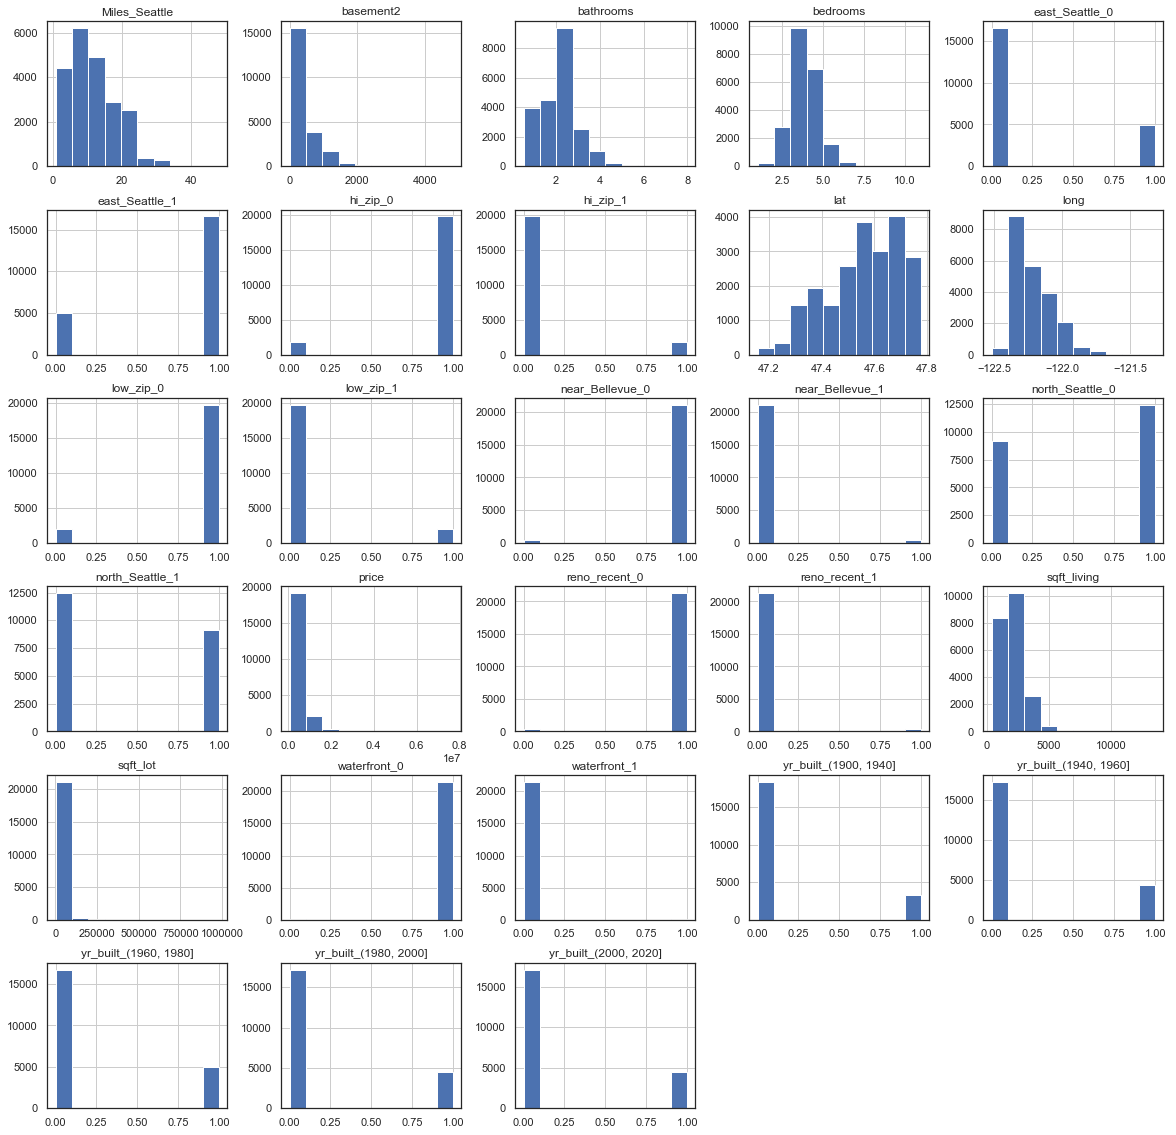

In [84]:
# view new columns
df.hist(figsize = [20,20]);

#### Clean up columns

In [85]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [86]:
df.columns = [col.replace('.', '_') for col in df.columns]

In [87]:
df.columns = [col.replace(',', '') for col in df.columns]
df.columns = [col.replace('(', '') for col in df.columns]
df.columns = [col.replace(']', '') for col in df.columns]

In [88]:
df.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'lat',
 'long',
 'basement2',
 'Miles_Seattle',
 'waterfront_0',
 'waterfront_1',
 'yr_built_1900_1940',
 'yr_built_1940_1960',
 'yr_built_1960_1980',
 'yr_built_1980_2000',
 'yr_built_2000_2020',
 'reno_recent_0',
 'reno_recent_1',
 'north_Seattle_0',
 'north_Seattle_1',
 'east_Seattle_0',
 'east_Seattle_1',
 'near_Bellevue_0',
 'near_Bellevue_1',
 'hi_zip_0',
 'hi_zip_1',
 'low_zip_0',
 'low_zip_1']

In [89]:
# drop zero one hot encoded columns, this is included as the inverse of '1' columns
df = df.drop(['waterfront_0', 'reno_recent_0', 'north_Seattle_0', 'east_Seattle_0', 'hi_zip_0', 'low_zip_0', 'near_Bellevue_0'], axis =1)
print(df.shape)
df.head(2)

(21592, 21)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,long,basement2,Miles_Seattle,waterfront_1,...,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,reno_recent_1,north_Seattle_1,east_Seattle_1,near_Bellevue_1,hi_zip_1,low_zip_1
0,221900.0,3,1.00,1180,5650,47.5112,-122.257,0,7.616113,0,...,1,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,47.7210,-122.319,400,7.841298,0,...,1,0,0,0,0,1,1,0,0,0


#### View new scatter plots and histograms

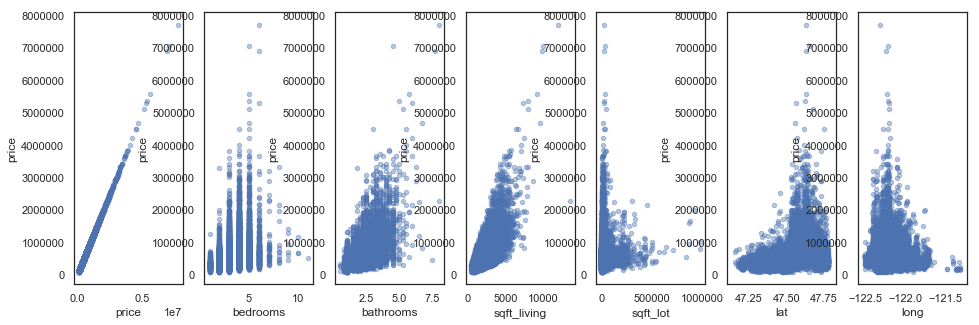

In [90]:
xlist5 = df.iloc[:, 0:7]

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,5))
for col, ax in zip(list(xlist5), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

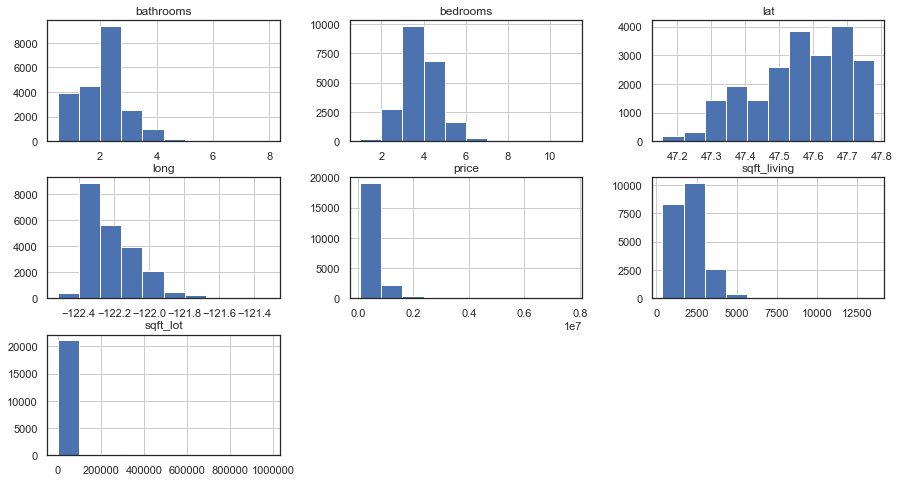

In [91]:
xlist5.hist(figsize = (15,8));

In [92]:
# drop lat and log - represented by miles from Seattle, and north, east columns
df = df.drop(['lat', 'long'], axis =1)
print(df.shape)

(21592, 19)


### Perform log transformations and min / max scaling

In [93]:
# log transformations to normalize data
logprice = np.log(df['price'])
loglive = np.log(df['sqft_living'])
loglot = np.log(df['sqft_lot'])
logmiles = np.log(df['Miles_Seattle'])
logbase = np.log(df['basement2']+1) #basement2 has many zero values, adding 1 so that log transformation works
bedrm = np.log(df['bedrooms'])
bathrm = np.log(df['bathrooms'])

In [94]:
# Log transformation and minmax scaling to normalize and scale the data
# Log makes the data more normalized. Min/max scales the data - use for feature ranking such as RFE and required for some DS model.
df['price'] = (logprice-min(logprice))/(max(logprice)-min(logprice))
df['sqft_living'] = (loglive-min(loglive))/(max(loglive)-min(loglive))
df['sqft_lot'] = (loglot-min(loglot))/(max(loglot)-min(loglot))
df['Miles_Seattle'] = (logmiles-min(logmiles))/(max(logmiles)-min(logmiles))
df['basement2'] = (logbase-min(logbase))/(max(logbase)-min(logbase))
df['bedrooms'] = (bedrm-min(bedrm))/(max(bedrm)-min(bedrm))
df['bathrooms'] = (bathrm-min(bathrm))/(max(bathrm)-min(bathrm))


### Normalized histograms with kde plots to explore the distributions of continuous variables in the dataset

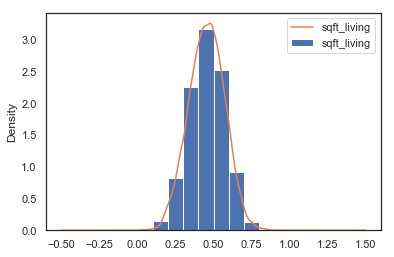

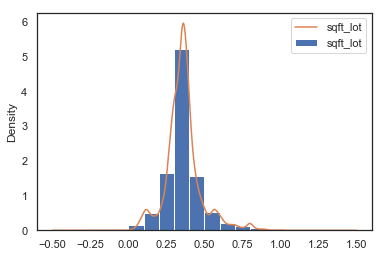

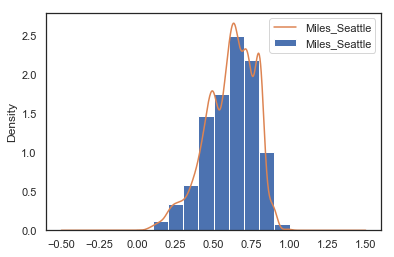

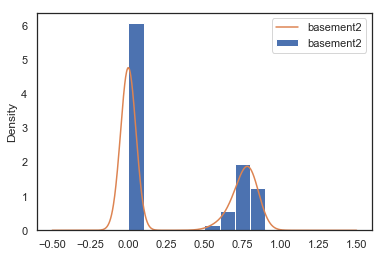

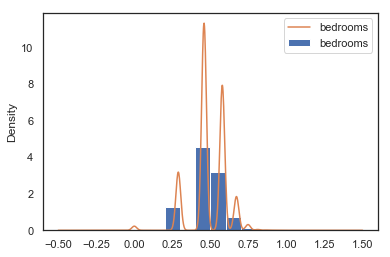

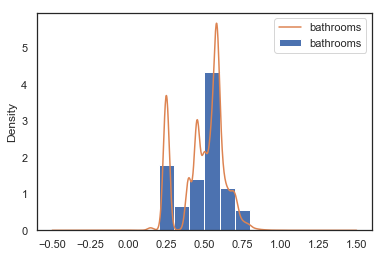

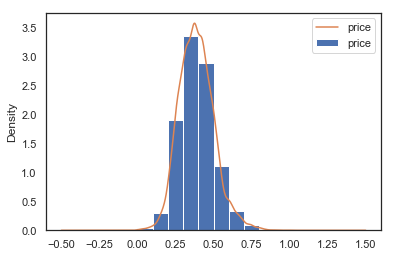

In [95]:
for column in ['sqft_living', 'sqft_lot', 'Miles_Seattle', 'basement2', 'bedrooms', 'bathrooms', 'price']:
    df[column].plot.hist(density=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

### Joint plots: Check for the linearity assumption between predictors and target variable

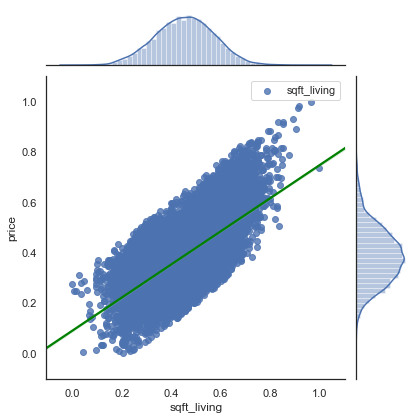

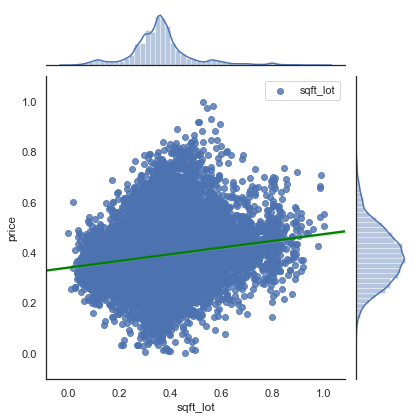

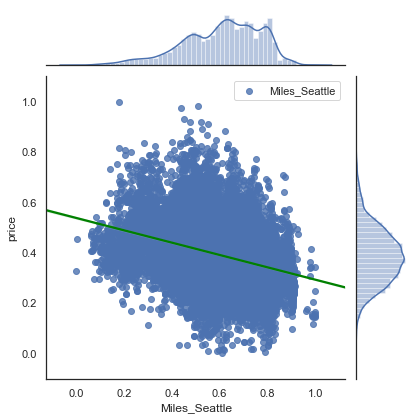

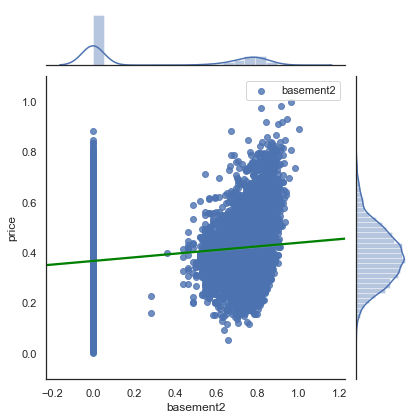

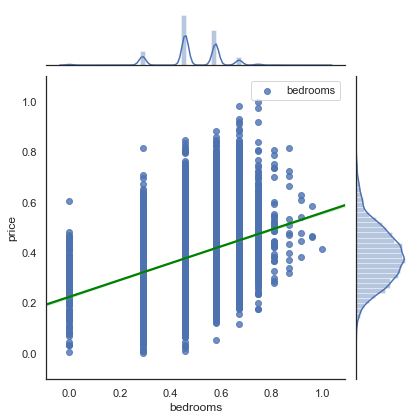

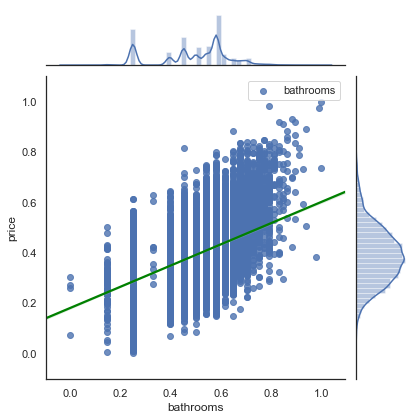

In [96]:
for column in ['sqft_living', 'sqft_lot', 'Miles_Seattle', 'basement2', 'bedrooms', 'bathrooms']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

    plt.legend()
    plt.show()

In [97]:
# Simplify model - drop columns
# Having already run the model with these columns with little added value, I am removing them.

# drop basement2 (size of house represented by sqft)
df = df.drop(['basement2', 'east_Seattle_1'], axis =1)
print(df.shape)

(21592, 17)


# Stage 4: Model

### Run initial model as a baseline
* **run as a test** - see how we can improve this

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [99]:
data_mini.head()

,price,sqft_living,sqft_above,Miles_Seattle,north_Seattle
0,221900.0,1180,1180,7.616113,0
1,538000.0,2570,2170,7.841298,1
2,180000.0,770,770,10.153451,1
3,604000.0,1960,1050,6.600281,0
4,510000.0,1680,1680,13.526635,1


In [100]:
formula = "price ~ sqft_living"
model = ols(formula= formula, data=data_mini).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:23:31   Log-Likelihood:            -2.9999e+05
No. Observations:               21592   AIC:                         6.000e+05
Df Residuals:                   21590   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.413e+04   4410.867    -10.004      0.000   -5.28e+04   -3.55e+04
sqft_living   280.9258      1.940    144.821      0.000     277.124     284.728
==============================================================================
Omnibus:                    14796.225   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542285.051
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.895   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Using just sqft_living, our test model explains almost half of the price variability**

## Run new model

In [101]:
# drop zero one hot encoded columns, this is included as the inverse of '1' columns
df = df.drop(['yr_built_1900_1940'], axis =1)
print(df.shape)
df.head(2)

(21592, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,Miles_Seattle,waterfront_1,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,reno_recent_1,north_Seattle_1,near_Bellevue_1,hi_zip_1,low_zip_1
0,0.227669,0.458157,0.250000,0.322166,0.316200,0.554718,0,1,0,0,0,0,0,0,0,0
1,0.420522,0.458157,0.542481,0.538392,0.349104,0.561765,0,1,0,0,0,0,1,0,0,0


In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

# Rather than typing out all the predictors: formula = "price ~ sqft_living+sqft_lot+basement2+Miles_Seattle+bedrooms_1 ..."
# First seperate out the outcome variable price, and then use a "+".join() command on the predictors

In [104]:
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     5012.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:23:32   Log-Likelihood:                 32327.
No. Observations:               21592   AIC:                        -6.462e+04
Df Residuals:                   21576   BIC:                        -6.449e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2103      0.002     88.018      0.000       0.206       0.215
bedrooms              -0.0801      0.004    -18.751      0.000      -0.089      -0.072
bathrooms              0.0473      0.005      9.958      0.000       0.038       0.057
sqft_living            0.5754      0.006     95.836      0.000       0.564       0.587
sqft_lot               0.1541      0.004     35.428      0.000       0.146       0.163
Miles_Seattle         -0.2344      0.003    -68.588      0.000      -0.241      -0.228
waterfront_1           0.1676      0.005     34.280      0.000       0.158       0.177
yr_built_1940_1960    -0.0151      0.001    -11.577      0.000      -0.018      -0.013
yr_built_1960_1980    -0.0180      0.001    -12.871      0.000      -0.021      -0.015
yr_built_1980_2000    -0.0035      0.002     -2.294      0.022      -0.007      -0.001
yr_built_2000_2020     0.0113      0.002      7.122      0.000       0.008       0.014
reno_recent_1          0.0256      0.003      8.609      0.000       0.020       0.031
north_Seattle_1        0.0493      0.001     61.105      0.000       0.048       0.051
near_Bellevue_1        0.0593      0.003     22.963      0.000       0.054       0.064
hi_zip_1               0.0614      0.002     40.713      0.000       0.058       0.064
low_zip_1             -0.0489      0.001    -35.033      0.000      -0.052      -0.046
==============================================================================
Omnibus:                      270.196   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.624
Skew:                          -0.066   Prob(JB):                    1.05e-102
Kurtosis:                       3.710   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
print('R2: ', model.rsquared)

R2:  0.7770062567324667


### Some experiments I ran 

Didn't end up using as of these. They either did not improve the model, or introduced errors

- bin bedrooms over 6
- bin bathrooms - or drop
- floors - ok, but don't mean much
- cond 1 - p val error
- grade 3 - p val error
- yr build - p val error before 1940
- zipcode error as individual column - 98010, 98014, 98019, 98028, 98133

### Running a different model using sklearn, but expecting the same result

In [106]:
target = df[['price']]
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(predictors, target)
print(linreg.intercept_)

[0.21031725]


In [107]:
print(linreg.coef_)

[[-0.0801486   0.04734007  0.57538009  0.15406979 -0.23441249  0.16760518
  -0.01508548 -0.0179734  -0.0035401   0.01134539  0.02559278  0.04933937
   0.05930159  0.06135647 -0.04894397]]


In [108]:
yhat = linreg.predict(predictors)
y = target
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-predictors.shape[1]-1)

$SS_{residual} = \sum (y - \hat{y})^2 $

$SS_{total} = \sum (y - \bar{y})^2 $

$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$

$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$

In [109]:
print(r_squared)
print(adjusted_r_squared)

price    0.777006
dtype: float64
price    0.776851
dtype: float64


## Checking for Normality / Homoscedasticity

In [110]:
import statsmodels.api as sm
import scipy.stats as stats

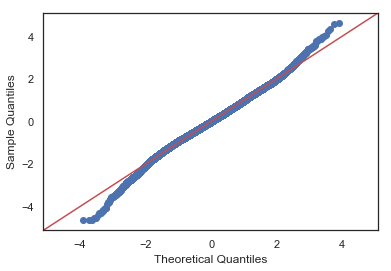

In [111]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

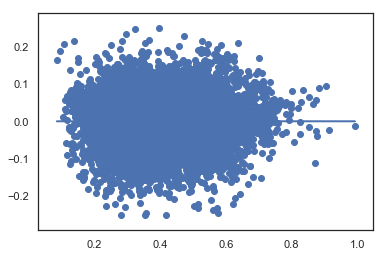

In [112]:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(df))]);


qqplot looks normal for the most part, but has some evidence of being heavy-tailed, that is extreme positive and negative residuals. The model also appears to meet the homoscedasticity test, that is, residual variance remains constant as predicted values increase. However, the chart does show a tail skewed to the right. Both of these may warrant a further look at outliers.

## Feature ranking with recursive feature elimination

#### Use feature ranking to select the 10 most important features

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(predictors, y)

C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
selector.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True])

In [115]:
selected_columns = predictors.columns[selector.support_ ]
linreg.fit(predictors[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 5, 4, 6, 3, 2, 1, 1, 1, 1])

In [117]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'Miles_Seattle', 'waterfront_1', 'yr_built_1940_1960',
       'yr_built_1960_1980', 'yr_built_1980_2000', 'yr_built_2000_2020',
       'reno_recent_1', 'north_Seattle_1', 'near_Bellevue_1', 'hi_zip_1',
       'low_zip_1'],
      dtype='object')

In [118]:
selected_columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'Miles_Seattle',
       'waterfront_1', 'north_Seattle_1', 'near_Bellevue_1', 'hi_zip_1',
       'low_zip_1'],
      dtype='object')

#### RFE drops yr_built columns and reno_recent column

In [119]:
(predictors[selected_columns]).head()

,bedrooms,bathrooms,sqft_living,sqft_lot,Miles_Seattle,waterfront_1,north_Seattle_1,near_Bellevue_1,hi_zip_1,low_zip_1
0,0.458157,0.250000,0.322166,0.316200,0.554718,0,0,0,0,0
1,0.458157,0.542481,0.538392,0.349104,0.561765,0,1,0,0,0
2,0.289065,0.250000,0.203585,0.391875,0.624257,0,1,0,0,0
3,0.578130,0.646241,0.463123,0.300001,0.520099,0,0,0,0,0
4,0.458157,0.500000,0.420302,0.363617,0.693626,0,1,0,0,0


In [120]:
yhat = linreg.predict(predictors[selected_columns])

In [121]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-predictors[selected_columns].shape[1]-1)

In [122]:
r_squared

price    0.770283
dtype: float64

In [123]:
adjusted_r_squared

price    0.770177
dtype: float64

#### r2 is virtually unchanged. 0.777 vs 0.770

### Re-run the stats model with RFE selected columns

In [124]:
predictors2 = '+'.join(predictors[selected_columns])
formula = outcome + "~" + predictors2
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     7237.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:23:47   Log-Likelihood:                 32006.
No. Observations:               21592   AIC:                        -6.399e+04
Df Residuals:                   21581   BIC:                        -6.390e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2059      0.002     90.872      0.000       0.201       0.210
bedrooms           -0.1022      0.004    -24.271      0.000      -0.110      -0.094
bathrooms           0.0730      0.004     16.976      0.000       0.065       0.081
sqft_living         0.5993      0.006     99.825      0.000       0.588       0.611
sqft_lot            0.1160      0.004     29.315      0.000       0.108       0.124
Miles_Seattle      -0.2319      0.003    -76.046      0.000      -0.238      -0.226
waterfront_1        0.1642      0.005     33.144      0.000       0.154       0.174
north_Seattle_1     0.0480      0.001     58.763      0.000       0.046       0.050
near_Bellevue_1     0.0563      0.003     21.618      0.000       0.051       0.061
hi_zip_1            0.0594      0.002     38.946      0.000       0.056       0.062
low_zip_1          -0.0524      0.001    -37.207      0.000      -0.055      -0.050
==============================================================================
Omnibus:                      229.674   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.126
Skew:                          -0.059   Prob(JB):                     1.74e-83
Kurtosis:                       3.640   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Run a train-test-split

To evaluate the model I'll compare predicted values, $\hat y$ to the actual value, $y$. The difference between the two values is the residuals. The train test split compares residuals for both the test set and the training set:

$r_{i,train} = y_{i,train} - \hat y_{i,train}$ 

$r_{i,test} = y_{i,test} - \hat y_{i,test}$ 

To summarize all the results in the test set and training set, I'll use the Mean Squared Error:

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

I want the MSE to be similar for the training and test sets

In [125]:
X = (predictors[selected_columns])

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [127]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17273 4319 17273 4319


In [128]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.00303154227396653
Test Mean Squarred Error: 0.0029766542406143475


#### Great. There does not seem to be a big difference between the train and test MSE!

## 10-fold cross validation with the final model

#### This validation test will split the dataset into 10 evenly sized parts. I'll check the results against each other, and the train / test split above

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [131]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

In [132]:
cv_10_results

array([-0.00305576, -0.00312068, -0.00324694, -0.0031184 , -0.00299732,
       -0.00295614, -0.00296566, -0.0030461 , -0.00306996, -0.00280233])

#### The results of all the tests look similar

# Stage 5: Interpret

### Interpret log transformation min/max scaling for top 3

In [133]:
from math import exp, expm1

In [134]:
model.params.sort_values(ascending=False)

sqft_living        0.599285
Intercept          0.205911
waterfront_1       0.164166
sqft_lot           0.116012
bathrooms          0.073049
hi_zip_1           0.059408
near_Bellevue_1    0.056300
north_Seattle_1    0.048000
low_zip_1         -0.052359
bedrooms          -0.102219
Miles_Seattle     -0.231881
dtype: float64

In [135]:
# Original min/max scaling
# df['price'] = (logprice-min(logprice))/(max(logprice)-min(logprice))
# df['sqft_living'] = (loglive-min(loglive))/(max(loglive)-min(loglive))
# df['sqft_lot'] = (loglot-min(loglot))/(max(loglot)-min(loglot))
# df['Miles_Seattle'] = (logmiles-min(logmiles))/(max(logmiles)-min(logmiles))
# df['basement2'] = (logbase-min(logbase))/(max(logbase)-min(logbase))
# df['bedrooms'] = (bedrm-min(bedrm))/(max(bedrm)-min(bedrm))
# df['bathrooms'] = (bathrm-min(bathrm))/(max(bathrm)-min(bathrm))

In [136]:
# rank #1. sqft_living
# log(price) = intercept + B1 * log(sqft_living) + error: 
     # "1% increase in sqft_living is associated with a (B1)% increase in price"
# logmin/max was a one step transformation so use the coefficient
model.params.sqft_living

0.5992851593081064

#### a 10% increase in the livable square footage of a house is associated to a 6% increase in price.

At mean values (2080 sqft, 540k price) a 10 percent increase would mean that 200 extra square feet would cost an extra 32,000 dollars in price. This is 162 per square foot. Current average construction costs are about 150 -170 per square foot, so this feels about right.

In [137]:
# rank #2. Mile_Seattle
model.params.Miles_Seattle

-0.23188052977607895

#### a 10% increase in the mileage from Seattle is associated to a 2.3% decrease in price
The mean distance from Seattle is 11.5 miles, to move 1 mile closer to Seattle would cost an extra 10,800 dollars in price. To move within a mile of Seattle would cost an extra 114,000 dollars in price.

In [138]:
# log(price) = intercept + B1 * waterfront + error: 
    # "1% increase in waterfront is associated with a (B1 * 100)% increase in price"
# waterfront was not log/min/max scaled so it has a different formula
model.params.waterfront_1

0.16416577525850262

In [139]:
model.params.waterfront_1 * 100

16.41657752585026

#### adding a waterfront view is associated to a 16% increase in price
If the mean house had a waterfront view it would cost an extra 86,000 dollars in price

In [140]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle,Miles_Bellevue,near_Bellevue,hi_zip,low_zip
count,2.159200e+04,21592.000000,21592.000000,21592.00000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,...,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000
mean,5.402861e+05,3.371758,2.115830,2080.30942,14875.022786,1.494141,0.005835,0.233096,3.409735,7.658021,...,12736.805900,291.719387,0.016210,11.531187,0.424231,0.768803,10.729602,0.024407,0.086050,0.089200
std,3.673945e+05,0.904061,0.768898,918.02668,37828.864507,0.539703,0.076169,0.764523,0.650352,1.173023,...,27129.769374,442.675109,0.126284,6.665318,0.494237,0.421608,5.645842,0.154313,0.280445,0.285038
min,7.800000e+04,1.000000,0.500000,370.00000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.000000,0.000000,0.768335,0.000000,0.000000,0.188461,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.00000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,0.000000,0.000000,6.066785,0.000000,1.000000,7.046130,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.00000,7617.000000,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,0.000000,0.000000,10.318127,0.000000,1.000000,9.443696,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.00000,10679.750000,2.000000,0.000000,0.000000,4.000000,8.000000,...,10080.000000,560.000000,0.000000,15.811599,1.000000,1.000000,13.187872,0.000000,0.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.00000,982998.000000,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,4820.000000,1.000000,48.016100,1.000000,1.000000,41.812188,1.000000,1.000000,1.000000


#### Back to the original questions:

#### Can I afford to live close to Seattle?
Yes, although it is more expensive to live near the city, by sacrificing living space I can afford to move closer. For example a 1375 square foot house within a mile of Seattle, would be equivalent to a 2080 square foot house 11 miles from Seattle. Also note that it is cheaper to live on the south side of the city than the north side.

#### What is more costly, an extra bathroom or extra bedroom?
In choosing a house, an extra bathroom is more expensive. The extra square footage required for a bedroom is already accounted for in the living space size.

#### What has the greatest impact on price?
In a single step having a waterfront view has the greatest impact. However, you can only add a view once. Continuing to increase the house's living area has the greatest total impact on price.

#### How confident am I in the predictive quality of this model?
This model is reasonably robust. Based on the r2 value it explains 77% of the variance in house prices.

#### What are some things that could cause the results to be wrong?
The model doesn't take into account many things that make an area a desirable place to live. Things such as the character of a neighborhood, a good school district, easy access to entertainment and medical, crime rate and traffic. These all have a major influence on housing price.

I also have some concerns about the influence of outliers based on the qqplot and homoscedasticity tests. This may be worth some further investigation. Maybe it is worth limiting the scope of the model at the extremes, to make it more accurate for the majority of houses


## Charts for presentation

In [141]:
feature_rank = model.params.drop(['Intercept']).abs().sort_values(ascending=True)

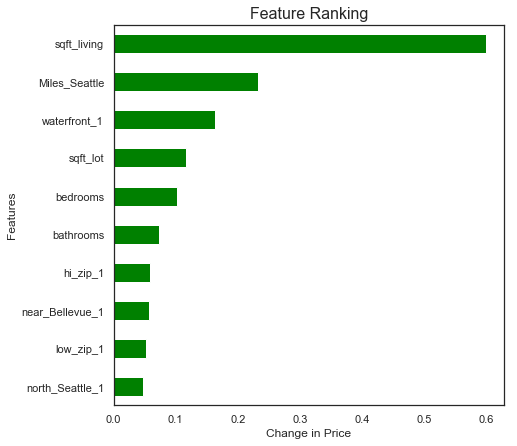

In [142]:
feature_rank.plot(kind='barh' , color='green', figsize=(7,7));
plt.title('Feature Ranking', fontsize=16);
plt.xlabel("Change in Price");
plt.ylabel("Features");
plt.savefig('ftr_rank.png', bbox_inches='tight')

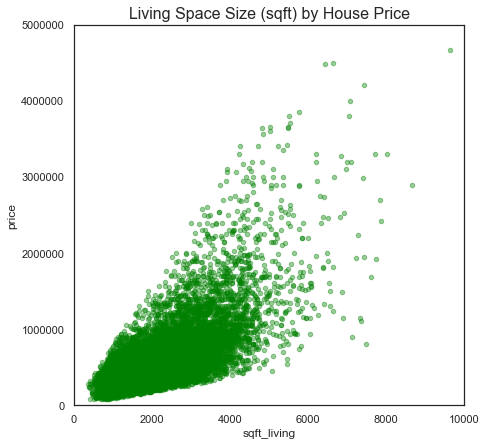

In [143]:
df2.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='green', figsize=(7,7))
plt.xlim(0, 10000)
plt.ylim(0, 5000000)
plt.title('Living Space Size (sqft) by House Price', fontsize=16);
plt.savefig('live_spce.png', bbox_inches='tight')
plt.show();

In [144]:
df3 = df2[df2["price"] <= 2000000]

In [145]:
df4 = df3[df3["Miles_Seattle"] <= 30]

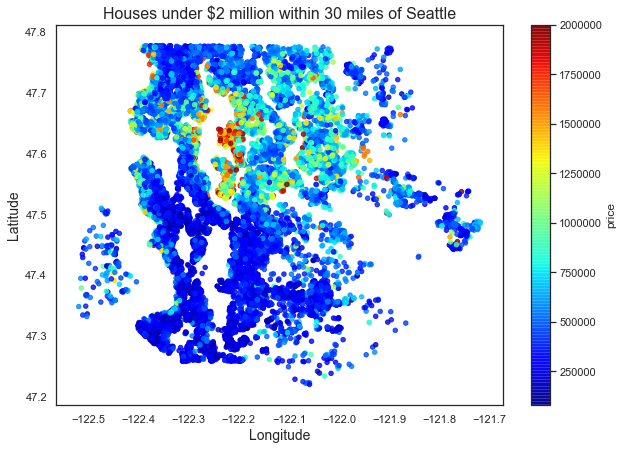

In [146]:
df4.plot(kind="scatter", x='long', y='lat',
    c='price', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.8, sharex=False, figsize=(10,7),)
plt.title('Houses under $2 million within 30 miles of Seattle', fontsize=16);
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.savefig('House_under_2.png', bbox_inches='tight')
plt.show();

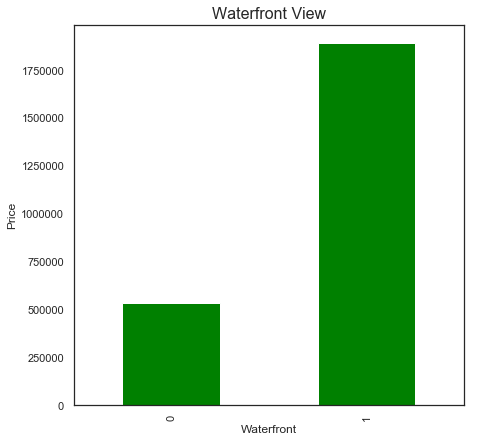

In [147]:
wtr_frnt = df2.groupby('waterfront')['price'].mean()
wtr_frnt.plot(kind='bar' , color='green', figsize=(7,7));
plt.title('Waterfront View', fontsize=16);
plt.xlabel("Waterfront");
plt.ylabel("Price");
plt.savefig('waterfront.png', bbox_inches='tight')

In [148]:
wtr_frnt

waterfront
0    5.323493e+05
1    1.892440e+06
Name: price, dtype: float64